# Sentiment analysis for Yelp review classification

Today, let’s build a simple text classifier using Python’s Pandas, NLTK and Scikit-learn libraries. Our goal is to build a sentiment analysis model that predicts whether a user liked a local business or not, based on their review on Yelp.

# The dataset

Our data contains 10,000 reviews, with the following information for each one:

1.business_id (ID of the business being reviewed)

2.date (Day the review was posted)

3.review_id (ID for the posted review)

4.stars (1–5 rating for the business)

5.text (Review text)

6.type (Type of text)

7.user_id (User’s id)

8.{cool / useful / funny} (Comments on the review, given by other users)

# Importing the dataset

Firstly, let’s import the necessary Python libraries. NLTK is pretty much the standard library in Python library for text processing, which has many useful features. Today, we will just use NLTK for stopword removal.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

In [2]:
yelp = pd.read_csv('yelp.csv')

Let’s get some basic information about the data. The .shape method tells us the number of rows and columns in the dataframe.

In [3]:
yelp.shape

(10000, 10)

In [4]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [6]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


To get an insight on the length of each review, we can create a new column in yelp called text length. This column will store the number of characters in each review.

In [7]:
yelp['text length'] = yelp['text'].apply(len)
yelp.head()


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


# Exploring the dataset

Let’s visualise the data a little more by plotting some graphs with the Seaborn library.

Seaborn’s FacetGrid allows us to create a grid of histograms placed side by side. We can use FacetGrid to see if there’s any relationship between our newly created text length feature and the stars rating.

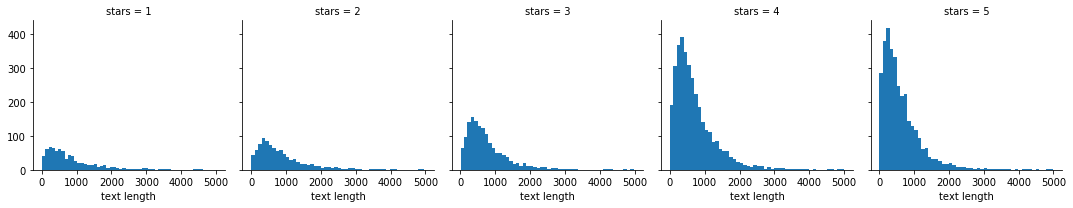

In [8]:
g = sns.FacetGrid(data=yelp, col='stars')
g.map(plt.hist, 'text length', bins=50)

Seems like overall, the distribution of text length is similar across all five ratings. However, the number of text reviews seems to be skewed a lot higher towards the 4-star and 5-star ratings. This may cause some issues later on in the process.

Next, let’s create a box plot of the text length for each star rating.

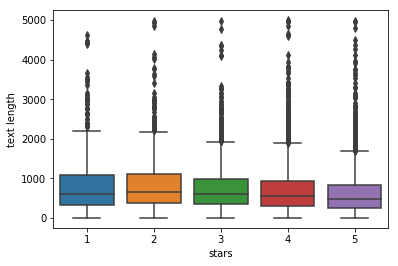

In [9]:
sns.boxplot(x='stars', y='text length', data=yelp)

From the plot, looks like the 1-star and 2-star ratings have much longer text, but there are many outliers (which can be seen as points above the boxes). Because of this, maybe text length won’t be such a useful feature to consider after all.

Let’s group the data by the star rating, and see if we can find a correlation between features such as cool, useful, and funny. We can use the .corr() method from Pandas to find any correlations in the dataframe.

In [10]:
stars = yelp.groupby('stars').mean()
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


To visualise these correlations, we can use Seaborn’s heatmap:

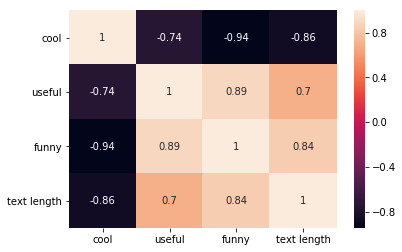

In [11]:
sns.heatmap(data=stars.corr(), annot=True)

Looking at the map, funny is strongly correlated with useful, and useful seems strongly correlated with text length. We can also see a negative correlation between cool and the other three features.

# Independent and dependent variables

Our task is to predict if a review is either bad or good, so let’s just grab reviews that are either 1 or 5 stars from the yelp dataframe. We can store the resulting reviews in a new dataframe called yelp_class.

In [12]:
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]
yelp_class.shape

(4086, 11)

We can see from .shape that yelp_class only has 4086 reviews, compared to the 10,000 reviews in the original dataset. This is because we aren’t taking into account the reviews rated 2, 3, and 4 stars.

Next, let’s create the X and y for our classification task. X will be the text column of yelp_class, and y will be the stars column.

In [13]:
X = yelp_class['text']
y = yelp_class['stars']

# Text pre-processing

The main issue with our data is that it is all in plain-text format.

In [14]:
X[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

The classification algorithm will need some sort of feature vector in order to perform the classification task. The simplest way to convert a corpus to a vector format is the bag-of-words approach, where each unique word in a text will be represented by one number.

First, let’s write a function that will split a message into its individual words, and return a list. We will also remove the very common words (such as “the”, “a”, “an”, etc.), also known as stopwords. To do this, we can take advantage of the NLTK library. The function below removes punctuation, stopwords, and returns a list of the remaining words, or tokens.

In [15]:
import string
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

To check if the function works, let’s pass in some random text and see if it gets processed correctly.

In [16]:
sample_text = "Hey there! This is a sample review, which happens to contain punctuations."
print(text_process(sample_text))

['Hey', 'sample', 'review', 'happens', 'contain', 'punctuations']


Seems like it works! There are no punctuations or stopwords, and the remaining words are returned to us as a list of tokens.

# Vectorisation

At the moment, we have our reviews as lists of tokens (also known as lemmas). To enable Scikit-learn algorithms to work on our text, we need to convert each review into a vector.

We can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Since there are many reviews, we can expect a lot of zero counts for the presence of a word in the collection. Because of this, Scikit-learn will output a sparse matrix.

Let’s import CountVectorizer and fit an instance to our review text (stored in X), passing in our text_process function as the analyser.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

Now, we can look at the size of the vocabulary stored in the vectoriser (based on X) like this:

In [21]:
len(bow_transformer.vocabulary_)

26435

To illustrate how the vectoriser works, let’s try a random review and get its bag-of-word counts as a vector. Here’s the twenty-fifth review as plain-text:

In [22]:
review_25 = X[24]
review_25


"I love this place! I have been coming here for ages.\nMy favorites: Elsa's Chicken sandwich, any of their burgers, dragon chicken wings, china's little chicken sandwich, and the hot pepper chicken sandwich. The atmosphere is always fun and the art they display is very abstract but totally cool!"

Now let’s see our review represented as a vector:

In [24]:
bow_25 = bow_transformer.transform([review_25])


In [25]:
bow_25

<1x26435 sparse matrix of type '<class 'numpy.int64'>'
	with 24 stored elements in Compressed Sparse Row format>

This means that there are 24 unique words in the review (after removing stopwords). Two of them appear thrice, and the rest appear only once. Let’s go ahead and check which ones appear thrice:

In [26]:
print(bow_transformer.get_feature_names()[11443])
print(bow_transformer.get_feature_names()[22077])

chicken
sandwich


Now that we’ve seen how the vectorisation process works, we can transform our X dataframe into a sparse matrix. To do this, let’s use the .transform() method on our bag-of-words transformed object

In [27]:
X = bow_transformer.transform(X)

We can check out the shape of our new X.

In [30]:
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)
# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))


Shape of Sparse Matrix:  (4086, 26435)
Amount of Non-Zero occurrences:  222391


# Training data and test data

As we have finished processing the review text in X, It’s time to split our X and y into a training and a test set using train_test_split from Scikit-learn. We will use 30% of the dataset for testing.

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Training our model

Multinomial Naive Bayes is a specialised version of Naive Bayes designed more for text documents. Let’s build a Multinomial Naive Bayes model and fit it to our training set (X_train and y_train).

In [32]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Testing and evaluating our model

Our model has now been trained! It’s time to see how well it predicts the ratings of previously unseen reviews (reviews from the test set). First, let’s store the predictions as a separate dataframe called preds.

In [33]:
preds = nb.predict(X_test)

Next, let’s evaluate our predictions against the actual ratings (stored in y_test) using confusion_matrix and classification_report from Scikit-learn.

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[157  71]
 [ 24 974]]


             precision    recall  f1-score   support

          1       0.87      0.69      0.77       228
          5       0.93      0.98      0.95       998

avg / total       0.92      0.92      0.92      1226



Looks like our model has achieved 92% accuracy! This means that our model can predict whether a user liked a local business or not, based on what they typed!

# Data Bias

Although our model achieved quite a high accuracy, there are some issues with bias caused by the dataset.

Let’s take some singular reviews, and see what rating our model predicts for each one.

# Predicting a singular positive review

In [35]:
positive_review = yelp_class['text'][59]
positive_review

"This restaurant is incredible, and has the best pasta carbonara and the best tiramisu I've had in my life. All the food is wonderful, though. The calamari is not fried. The bread served with dinner comes right out of the oven, and the tomatoes are the freshest I've tasted outside of my mom's own garden. This is great attention to detail.\n\nI can no longer eat at any other Italian restaurant without feeling slighted. This is the first place I want take out-of-town visitors I'm looking to impress.\n\nThe owner, Jon, is helpful, friendly, and really cares about providing a positive dining experience. He's spot on with his wine recommendations, and he organizes wine tasting events which you can find out about by joining the mailing list or Facebook page."

Seems like someone had the time of their life at this place, right? We can expect our model to predict a rating of 5 for this review.

In [36]:
positive_review_transformed = bow_transformer.transform([positive_review])
nb.predict(positive_review_transformed)[0]

5

Our model thinks this review is positive, just as we expected.

# Predicting a singular negative review

In [37]:
negative_review = yelp_class['text'][281]
negative_review

'Still quite poor both in service and food. maybe I made a mistake and ordered Sichuan Gong Bao ji ding for what seemed like people from canton district. Unfortunately to get the good service U have to speak Mandarin/Cantonese. I do speak a smattering but try not to use it as I never feel confident about the intonation. \n\nThe dish came out with zichini and bell peppers (what!??)  Where is the peanuts the dried fried red peppers and the large pieces of scallion. On pointing this out all I got was " Oh you like peanuts.. ok I will put some on" and she then proceeded to get some peanuts and sprinkle it on the chicken.\n\nWell at that point I was happy that atleast the chicken pieces were present else she would probably end up sprinkling raw chicken pieces on it like the raw peanuts she dumped on top of the food. \n\nWell then  I spoke a few chinese words and the scowl turned into a smile and she then became a bit more friendlier. \n\nUnfortunately I do not condone this type of behavior.

This is a slightly more negative review. So, we can expect our model to rate this a 1-star.

In [38]:
negative_review_transformed = bow_transformer.transform([negative_review])
nb.predict(negative_review_transformed)[0]

1

Our model is right again!

# Where the model goes wrong…

In [39]:
another_negative_review = yelp_class['text'][140]
another_negative_review

"Other than the really great happy hour prices, its hit or miss with this place. More often a miss. :(\n\nThe food is less than average, the drinks NOT strong ( at least they are inexpensive) , but the service is truly hit or miss.\n\nI'll pass."

Here’s another negative review. Let’s see if the model predicts this one correctly.

In [40]:
another_negative_review_transformed = bow_transformer.transform([another_negative_review])
nb.predict(another_negative_review_transformed)[0]

5

Our model thinks this review is positive, and that’s incorrect.


# Why the incorrect prediction?

One explanation as to why this may be the case is that our initial dataset had a much higher number of 5-star reviews than 1-star reviews. This means that the model is more biased towards positive reviews compared to negative ones.

In conclusion, although our model was a little biased towards positive reviews, it was fairly accurate with its predictions, achieving an accuracy of 92% on the test set.

# References

Dataset obtained from: Kaggle: Yelp Business Rating Prediction https://www.kaggle.com/c/yelp-recsys-2013